In [2]:
import matplotlib.pyplot as plt

In [3]:
def process_data(datafile):
    data = []
    with open(datafile,'r') as f:
        for line in f:
            data.append(line.split())
    bandwidths = [data[i][11] for i in range(5,len(data))]
#     print(bandwidths)
    parsed_bandwidths = []
    for bw in bandwidths:
        if 'k' in bw:
            bw = bw.rstrip('k') + "000"
            parsed_bandwidths.append(int(bw))
            continue
        parsed_bandwidths.append(int(bw))
    return parsed_bandwidths

In [4]:
def plot1(datafile1,datafile2,labels1,labels2, x_val):
    parsed_bandwidths1 = process_data(datafile1)
    parsed_bandwidths2 = process_data(datafile2)
#     print(parsed_bandwidths)
    plt.figure(figsize = (10,5))
    plt.xlabel('Time(s)')
    plt.ylabel('Bandwidth(bytes/s)')
    plt.axvline(x=x_val, linestyle = 'dashed', color = 'c')
    plt.plot(parsed_bandwidths1, label = labels1)
    plt.plot(parsed_bandwidths2, label = labels2)
    plt.legend()
    plt.savefig('combined1.png')

Graph showing bandwidth of 1 HTTP/2 transaction with 3 HTTP/2 transactions running in the background.

* Based on the subsequent tests, we assume that the background processes end at 4 seconds. There is no visible change in the bandwidth and it just shows a general increase over time. However, this transaction takes a much longer time compared to the 1 HTTP/3 and 3 HTTP/2 transactions due to the contesting for bandwidth when all 4 processes are running at the start. As bandwidth fairness needs to be satisfied, 

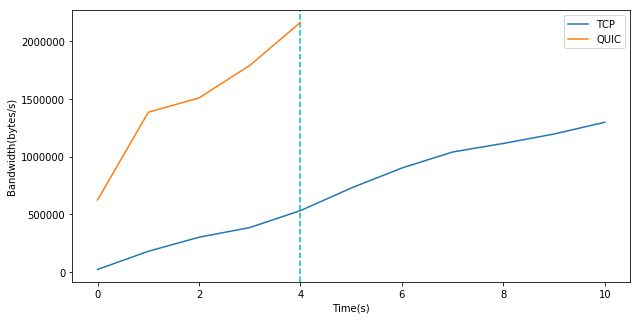

In [6]:
plot1('1http2_vs_3http2.log','1http3_vs_3http2.log',"TCP","QUIC", 4)

In [8]:
def plot2(datafile1,datafile2,labels1,labels2, x_val):
    parsed_bandwidths1 = process_data(datafile1)
    parsed_bandwidths2 = process_data(datafile2)
#     print(parsed_bandwidths)
    plt.figure(figsize = (10,5))
    plt.xlabel('Time(s)')
    plt.ylabel('Bandwidth(bytes/s)')
    plt.axvline(x=x_val, linestyle = 'dashed', color = 'c')
    plt.plot(parsed_bandwidths1, label = labels1)
    plt.plot(parsed_bandwidths2, label = labels2)
    plt.legend()
    plt.savefig('combined2.png')

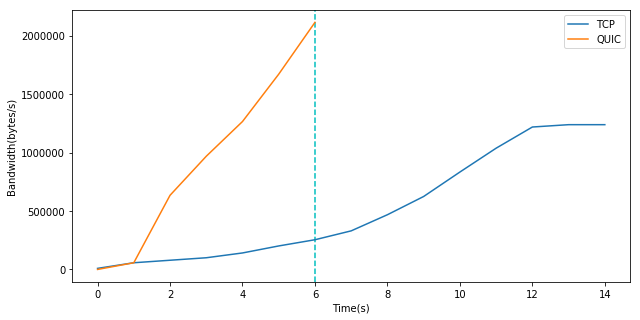

In [9]:
plot2('1http2_vs_3http3.log','1http3_vs_3http3.log', "TCP","QUIC",6)


In [11]:
def plot2(datafile1,datafile2,labels1,labels2):
    parsed_bandwidths1 = process_data(datafile1)
    parsed_bandwidths2 = process_data(datafile2)
#     print(parsed_bandwidths)
    plt.figure(figsize = (10,5))
    plt.xlabel('Time(s)')
    plt.ylabel('Bandwidth(bytes/s)')
#     plt.axvline(x=x_val, linestyle = 'dashed', color = 'c')
    plt.plot(parsed_bandwidths1, label = labels1)
    plt.plot(parsed_bandwidths2, label = labels2)
    plt.legend()
    plt.savefig('combined3.png')

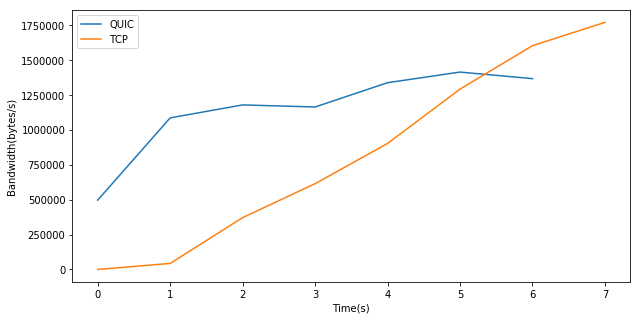

In [12]:
plot2('2http2_vs_2http3_quic.log','2http2_vs_2http3_tcp.log', "QUIC","TCP")